# Hanna Wierszok


Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [ ]:
## library imports here

In [1]:
import pandas as pd
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")
ha.head()

,age,sex,cp,trtbps,chol,restecg,thalach,output
0,63,1,3,145,233,0,150,1
1,37,1,2,130,250,1,187,1
2,56,1,1,120,236,1,178,1
3,57,0,0,120,354,1,163,1
4,57,1,0,140,192,1,148,1


## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Preparing the data
X = ha.drop('cp', axis=1)  # Features (excluding 'cp')
y = ha['cp']  # Target variable (type of chest pain)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_predictions = knn.predict(X_test_scaled)

# Fit Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)

# Fit Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
lda_predictions = lda.predict(X_test_scaled)

# Evaluating the models
knn_accuracy = accuracy_score(y_test, knn_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
lda_accuracy = accuracy_score(y_test, lda_predictions)

knn_accuracy, dt_accuracy, lda_accuracy

(0.4909090909090909, 0.32727272727272727, 0.5454545454545454)

## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

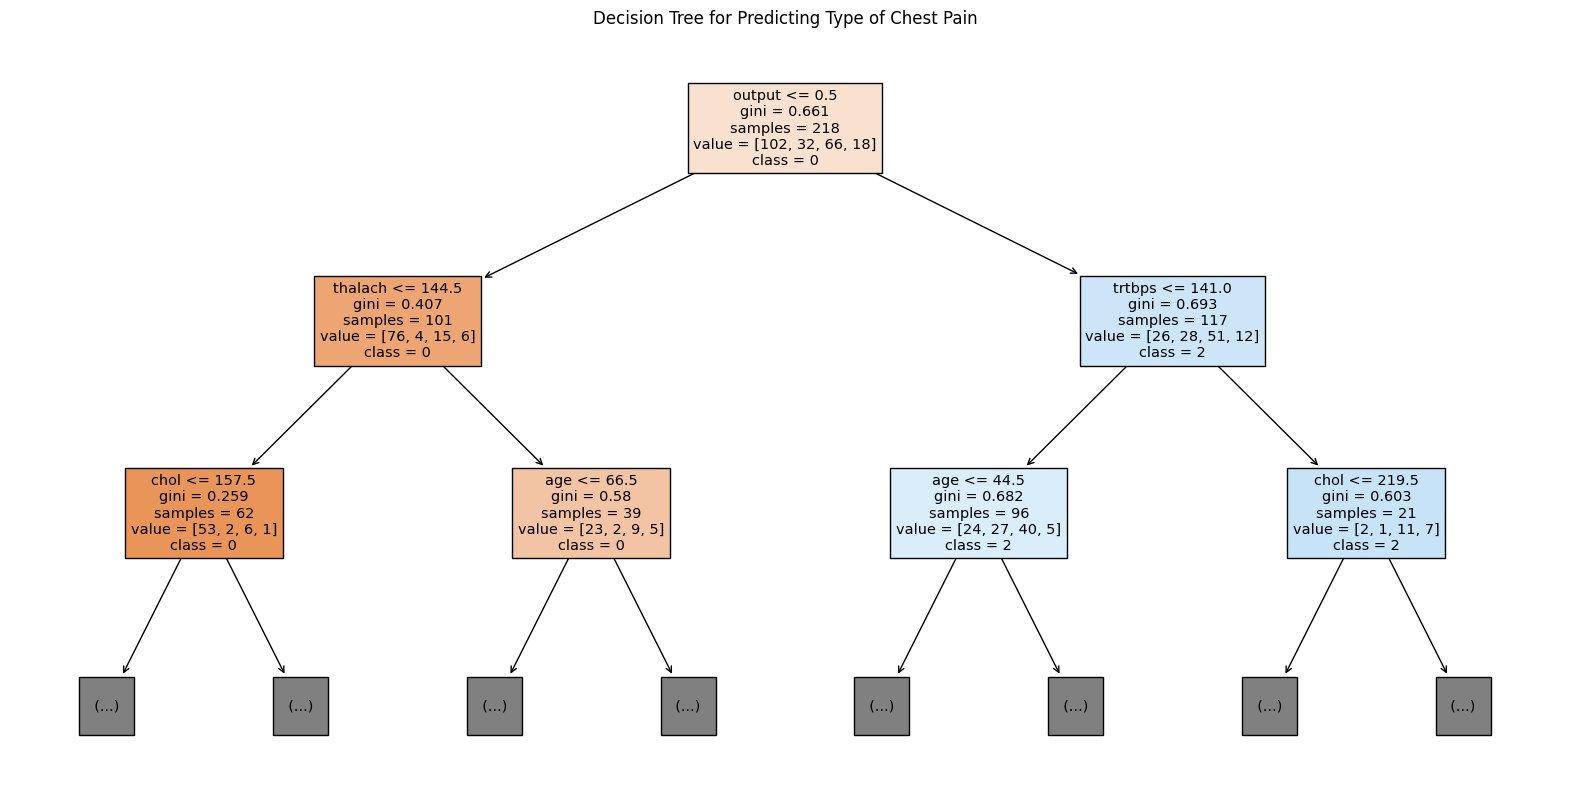

In [3]:
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['0', '1', '2', '3'], max_depth=2)
plt.title("Decision Tree for Predicting Type of Chest Pain")
plt.show()

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Create the new column 'cp_is_3'
ha['cp_is_3'] = (ha['cp'] == 3).astype(int)

# Preparing the data for logistic regression
X = ha.drop(['cp', 'cp_is_3'], axis=1)  # Features (excluding 'cp' and 'cp_is_3')
y = ha['cp_is_3']  # New target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
log_reg_predictions = log_reg.predict(X_test_scaled)

# Calculating F1 Score
f1 = f1_score(y_test, log_reg_predictions)
f1

0.0

In [5]:
# Create the new column 'cp_is_2'
ha['cp_is_2'] = (ha['cp'] == 2).astype(int)

# Preparing the data for logistic regression
X = ha.drop(['cp', 'cp_is_2'], axis=1)  # Features (excluding 'cp' and 'cp_is_2')
y = ha['cp_is_2']  # New target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
log_reg_predictions = log_reg.predict(X_test_scaled)

# Calculating F1 Score
f1 = f1_score(y_test, log_reg_predictions)
f1

0.3478260869565218

In [6]:
# Create the new column 'cp_is_1'
ha['cp_is_1'] = (ha['cp'] == 1).astype(int)

# Preparing the data for logistic regression
X = ha.drop(['cp', 'cp_is_1'], axis=1)  # Features (excluding 'cp' and 'cp_is_1')
y = ha['cp_is_1']  # New target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
log_reg_predictions = log_reg.predict(X_test_scaled)

# Calculating F1 Score
f1 = f1_score(y_test, log_reg_predictions)
f1

0.5555555555555556

In [7]:
# Create the new column 'cp_is_0'
ha['cp_is_0'] = (ha['cp'] == 0).astype(int)

# Preparing the data for logistic regression
X = ha.drop(['cp', 'cp_is_0'], axis=1)  # Features (excluding 'cp' and 'cp_is_0')
y = ha['cp_is_0']  # New target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
log_reg_predictions = log_reg.predict(X_test_scaled)

# Calculating F1 Score
f1 = f1_score(y_test, log_reg_predictions)
f1

1.0

## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [8]:
from sklearn.metrics import roc_auc_score

# Filtering the dataset for only 0 and 1 types of chest pain
filtered_data = ha[ha['cp'].isin([0, 1])]

# Preparing the data
X_filtered = filtered_data.drop(['cp', 'cp_is_0', 'cp_is_1', 'cp_is_2','cp_is_3'], axis=1)  # Features (excluding 'cp' and 'cp_is_n')
y_filtered = filtered_data['cp'] == 1  # Target variable (1 if cp is 1, else 0)

# Splitting the data into training and testing sets
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42)

# Standardizing the features
X_train_scaled_filtered = scaler.fit_transform(X_train_filtered)
X_test_scaled_filtered = scaler.transform(X_test_filtered)

# Fit Logistic Regression on the filtered data
log_reg_filtered = LogisticRegression()
log_reg_filtered.fit(X_train_scaled_filtered, y_train_filtered)
log_reg_predictions_filtered = log_reg_filtered.predict_proba(X_test_scaled_filtered)[:, 1]

# Calculating ROC-AUC
roc_auc = roc_auc_score(y_test_filtered, log_reg_predictions_filtered)
roc_auc

0.7608695652173914

In [9]:
# Filtering the dataset for only 0 and 2 types of chest pain
filtered_data = ha[ha['cp'].isin([0, 2])]

# Preparing the data
X_filtered = filtered_data.drop(['cp', 'cp_is_0', 'cp_is_1', 'cp_is_2','cp_is_3'], axis=1)  # Features (excluding 'cp' and 'cp_is_n')
y_filtered = filtered_data['cp'] == 2  # Target variable (1 if cp is 2, else 0)

# Splitting the data into training and testing sets
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42)

# Standardizing the features
X_train_scaled_filtered = scaler.fit_transform(X_train_filtered)
X_test_scaled_filtered = scaler.transform(X_test_filtered)

# Fit Logistic Regression on the filtered data
log_reg_filtered = LogisticRegression()
log_reg_filtered.fit(X_train_scaled_filtered, y_train_filtered)
log_reg_predictions_filtered = log_reg_filtered.predict_proba(X_test_scaled_filtered)[:, 1]

# Calculating ROC-AUC
roc_auc = roc_auc_score(y_test_filtered, log_reg_predictions_filtered)
roc_auc

0.826530612244898

In [10]:
# Filtering the dataset for only 0 and 3 types of chest pain
filtered_data = ha[ha['cp'].isin([0, 3])]

# Preparing the data
X_filtered = filtered_data.drop(['cp', 'cp_is_0', 'cp_is_1', 'cp_is_2','cp_is_3'], axis=1)  # Features (excluding 'cp' and 'cp_is_n')
y_filtered = filtered_data['cp'] == 3  # Target variable (1 if cp is 3, else 0)

# Splitting the data into training and testing sets
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42)

# Standardizing the features
X_train_scaled_filtered = scaler.fit_transform(X_train_filtered)
X_test_scaled_filtered = scaler.transform(X_test_filtered)

# Fit Logistic Regression on the filtered data
log_reg_filtered = LogisticRegression()
log_reg_filtered.fit(X_train_scaled_filtered, y_train_filtered)
log_reg_predictions_filtered = log_reg_filtered.predict_proba(X_test_scaled_filtered)[:, 1]

# Calculating ROC-AUC
roc_auc = roc_auc_score(y_test_filtered, log_reg_predictions_filtered)
roc_auc

0.84472049689441

Because it had the highest roc_auc, the OvO method that was most effective at discriminating was cp 0 and 3. A model is better if its ROC-AUC score is closer to 1.